<a href="https://colab.research.google.com/github/Ahmetyldrr/LLM-Models-Pratic/blob/main/Chapter2_LLM_de_Anlamsal_Aray%C4%B1%C5%9F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Anlama

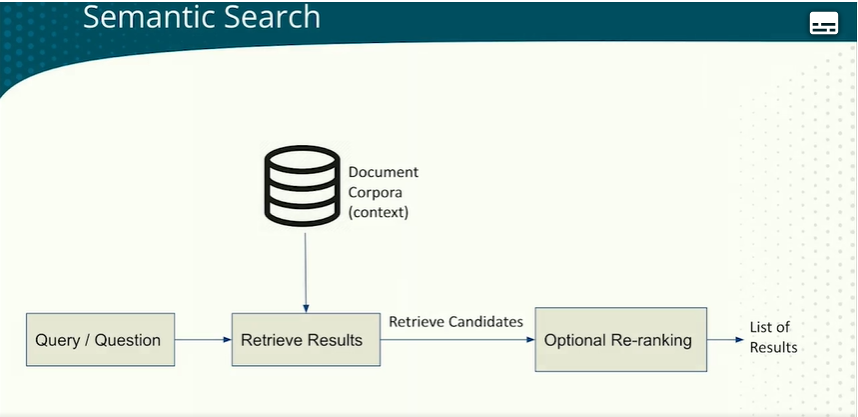

## Asimetrik ve Simetrik Arama

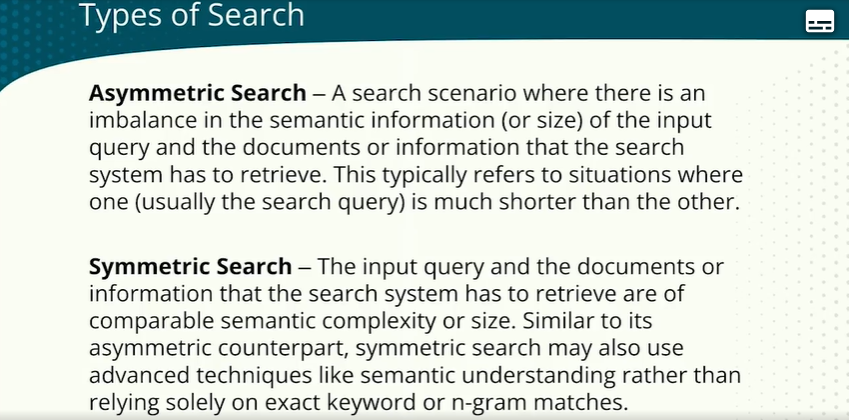

## Simetrik Arama

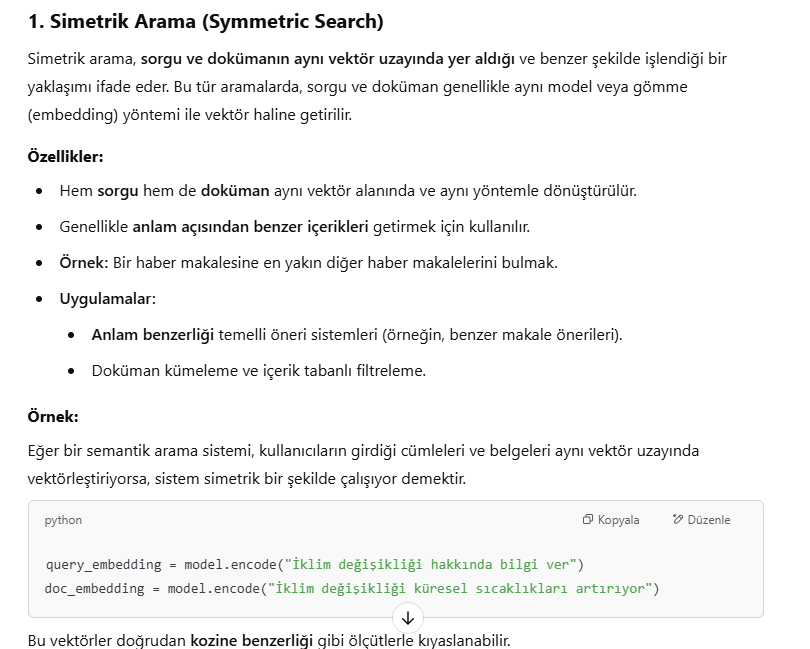

## Asimetrik Arama

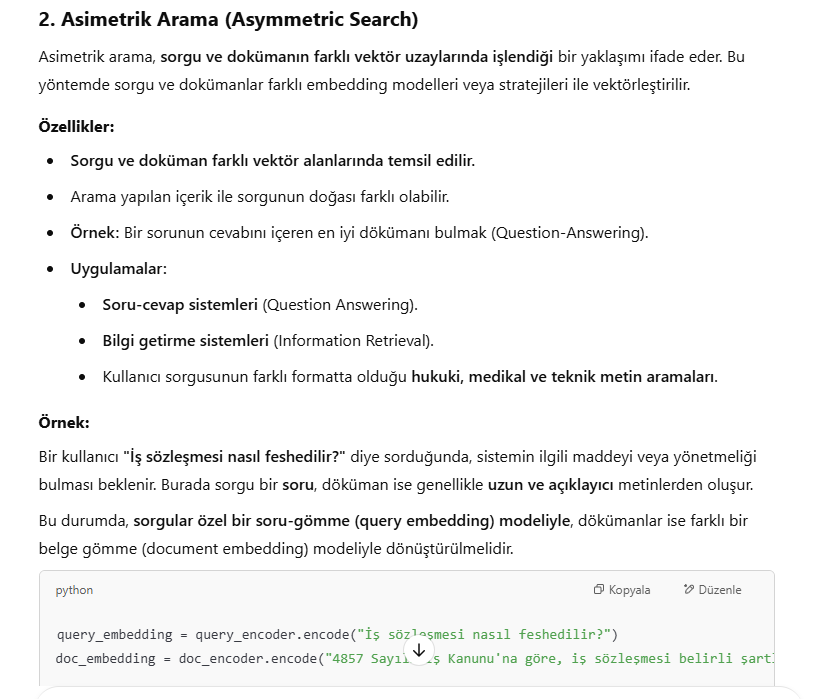v

## Simetrik ve Asimetrik Farkları

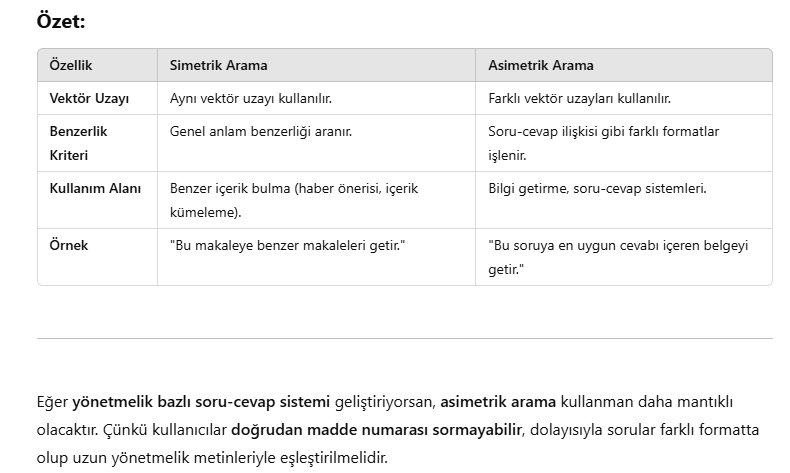

# OPEN Aİ vektörleştirmesi

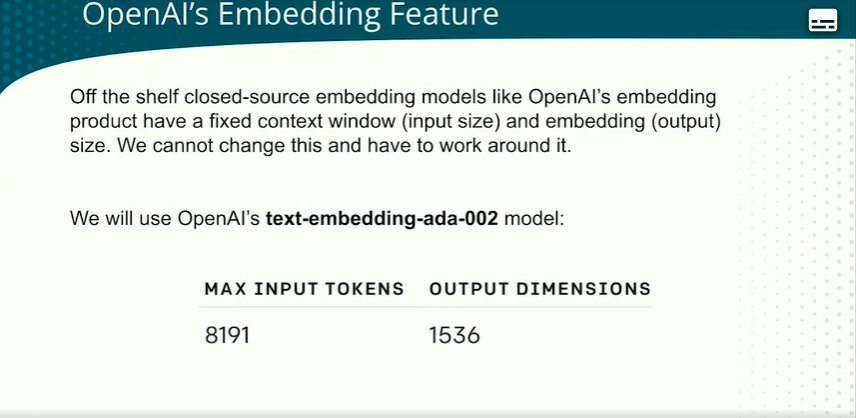

## Open Ai max token

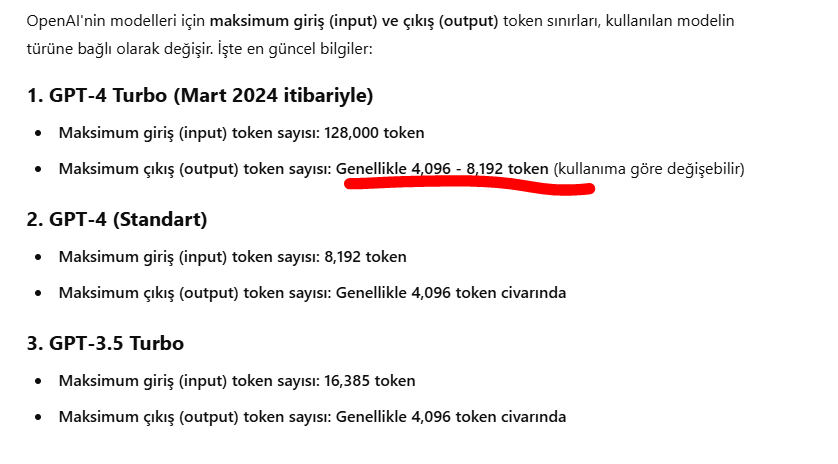

## Textleri Skorlama Nasıl Yapılır.

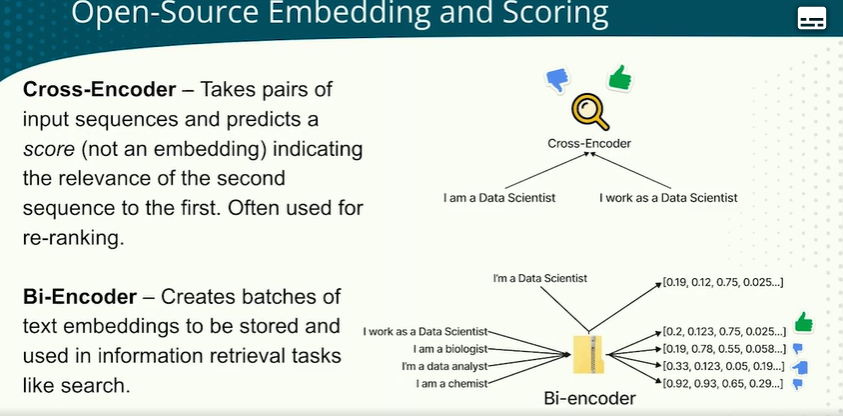

# Bi-encoder ve Cross-encoder Nedir.

Cross-Encoder ve Bi-Encoder, metin çifti (sorgu-belge, cümle çifti, vb.) benzerliğini ölçmek için kullanılan iki temel yöntemdir. Bu yaklaşımlar, özellikle semantik arama (semantic search), soru-cevap sistemleri (QA) ve bilgi getirme (retrieval) gibi alanlarda yaygın olarak kullanılır.

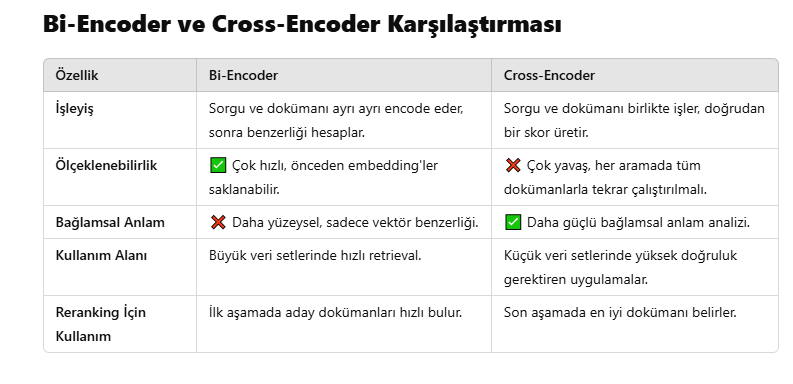

## Bi-Encoder

Bi-Encoder, **sorgu (query)** ve dokümanı ayrı ayrı **gömü (embedding)** uzaylarına dönüştürerek karşılaştıran bir yaklaşımdır. Yani, her metin için ayrı bir vektör üretilir ve bu vektörler doğrudan karşılaştırılır.

### Yapılan  İşlemler

1 - Sorgu (Q) ve Doküman (D), ayrı ayrı bir encoder modeline verilir.

2 - Her biri bağımsız olarak bir vektör uzayına gömülür (embedding).

3 - İki vektör arasındaki benzerlik (örneğin, kosinüs benzerliği) hesaplanır.

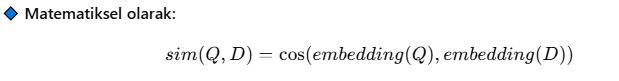

### En iyi hangi proje tür projede kullanılır.

**Semantik Arama:** Önceden hesaplanmış embedding'lerle hızlı metin benzerliği karşılaştırmaları.

**Bilgi Getirme (Retrieval):** Büyük belge koleksiyonlarında en alakalı dokümanları hızlıca bulma.

**Öneri Sistemleri:** Kullanıcının ilgisini çeken içeriklerin önerilmesi.

### Avantaj ve Dezavantajlar

✅ **Önceden indeksleme yapılabilir:** Dokümanlar önceden embedding'e dönüştürülerek veri tabanında saklanabilir ve sorgular hızlıca eşleştirilebilir.

✅ **Ölçeklenebilir:** Büyük veri setlerinde çok hızlı arama yapılabilir.

✅ **Gerçek zamanlı uygulamalara uygun:** Sorgu ile tüm doküman embedding'leri arasındaki benzerlik hesaplanarak hızlı sonuç elde edilir.

❌ **Bağlamsal etkileşim zayıf:** Sorgu ve doküman ayrı ayrı işlendiği için tam anlamıyla bağlam analizi yapamaz.

❌ Özellikle kısa metinler için doğruluk düşebilir.

### Örnek Kodlama

In [6]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

query = "What is artificial intelligence?"
document = "What is artificial intelligence?"

# Vektörleri hesapla
query_embedding = model.encode(query, convert_to_tensor=True)
doc_embedding = model.encode(document, convert_to_tensor=True)

# Kosinüs benzerliğini hesapla
similarity = util.pytorch_cos_sim(query_embedding, doc_embedding)
print(f"Benzerlik Skoru: {similarity.item()}")


Benzerlik Skoru: 1.0000001192092896


In [9]:
from sentence_transformers import SentenceTransformer, util

# Modeli yükle
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Belgeyi tanımla
document = "Here it is necessary to make many examples to understand how some models work."

# Modelin temsili ile belgeyi encode et
doc_embedding = model.encode(document, convert_to_tensor=True)

# Modelin temsili ile önceden eğitimli soru (query) ile karşılaştır
query = "how some models work."
query_embedding = model.encode(query, convert_to_tensor=True)

# Kosinüs benzerliğini hesapla
similarity = util.pytorch_cos_sim(query_embedding, doc_embedding)

# Sonuç
print(f"Model embedding ile belgenin temsili arasındaki benzerlik: {similarity.item()}")

# Bu skor, modelin ne kadar doğru bir şekilde belgenin içeriğini temsil ettiğini gösterir.


Model embedding ile belgenin temsili arasındaki benzerlik: 0.8584088087081909


In [11]:
query_embedding.shape

torch.Size([384])

In [22]:
from sentence_transformers import SentenceTransformer, util

# Türkçe'yi iyi anlayan bir model yükle
model = SentenceTransformer('dbmdz/bert-base-turkish-cased')

# Belgeyi tanımla
document = "Here it is necessary to make many examples to understand how some models work."

# Modelin embedding'ini al (burada modelin temsilini alıyoruz)
model_embedding = model.encode("artificial intelligence", convert_to_tensor=True)

# Belgenin embedding'ini al
doc_embedding = model.encode(document, convert_to_tensor=True)

# Kosinüs benzerliğini hesapla
similarity = util.pytorch_cos_sim(model_embedding, doc_embedding)

# Sonuç
print(f"Model embedding ile belgenin temsili arasındaki benzerlik: {similarity.item()}")


Model embedding ile belgenin temsili arasındaki benzerlik: 0.7871881127357483


## Cross-Encoder

**Cross-Encoder,** sorgu ve dokümanı birlikte bir modele vererek doğrudan bir skor üreten bir yaklaşımdır. Yani, iki metin birleştirilerek modele verilir ve model, bu çift için bir benzerlik skoru üretir.

### Yapılan İşlemler

1 - Sorgu ve doküman tek bir giriş olarak modellenir.

2 - Bir Transformer tabanlı model (BERT, RoBERTa vb.) bu metni işler ve doğrudan bir skor üretir.

3 - Bu skor, sorgu ve dokümanın ne kadar ilişkili olduğunu gösterir.

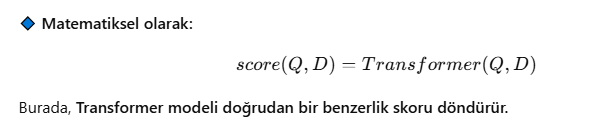

### En iyi hangi tür projede kullanılır.

**Soru-Cevap Sistemleri:** Kullanıcının sorduğu soruya en uygun cevabı içeren dokümanı bulma.

**Reranking (Yeniden Sıralama):** İlk aşamada Bi-Encoder ile filtrelenen dokümanları, en iyi eşleşmeyi bulmak için tekrar sıralama.

**Doğruluk öncelikli sistemler:** Ölçekten çok yüksek doğruluk gerektiren durumlar.

### Avantaj ve Dezavantajlar


✅ Bağlamsal olarak daha güçlüdür: Sorgu ve doküman arasındaki ilişkiyi doğrudan öğrenebilir.<br>
✅ Doğruluk oranı genellikle Bi-Encoder'dan daha yüksektir.<br>
✅ Karmaşık dil ilişkilerini daha iyi anlar.<br>

❌ Ölçeklenebilirliği düşüktür: Her sorgu için tüm dokümanlarla ayrı ayrı çalıştırılması gerektiğinden büyük veri setlerinde çok yavaş çalışır.<br>
❌ Önceden indeksleme yapılamaz: Çünkü doküman embedding'leri tek başına kullanılamaz, her aramada tüm dokümanların yeniden işlenmesi gerekir.

### Örnek Kodlama

In [26]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Model ve tokenizer'ı yükle
model_name = "cross-encoder/ms-marco-MiniLM-L-6-v2"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

query = "Yapay zeka nedir?"
document = "bu konuda hiçbirşey bilmem"

# Sorgu ve dokümanı birlikte encode et
inputs = tokenizer(query, document, return_tensors="pt", padding=True, truncation=True)

# Modelin çıktısını al
outputs = model(**inputs)

# logits'ı kontrol et
print(f"outputs.logits: {outputs.logits}")

# Softmax ile olasılıkları hesapla
softmax_scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Eğer softmax_scores'ta sadece 1 değer varsa, onu al
if softmax_scores.shape[1] > 1:
    similarity_score = softmax_scores[0][1].item()  # 1. etiketi (benzerlik)
else:
    similarity_score = softmax_scores[0][0].item()  # Tek bir skor varsa, o skoru al

print(f"Benzerlik Skoru: {similarity_score}")


outputs.logits: tensor([[-10.9000]], grad_fn=<AddmmBackward0>)
Benzerlik Skoru: 1.0


# Dokuman Parçalama - Chunk

Uzun bir PDF dosyasını parçalamak çok önemlidir. Bu yüzden bunun için gelişmiş tekniklerin kullanılması önemlidir. Yani kullanılan PDF in anlamlı olarak bölünmesi gerekir.

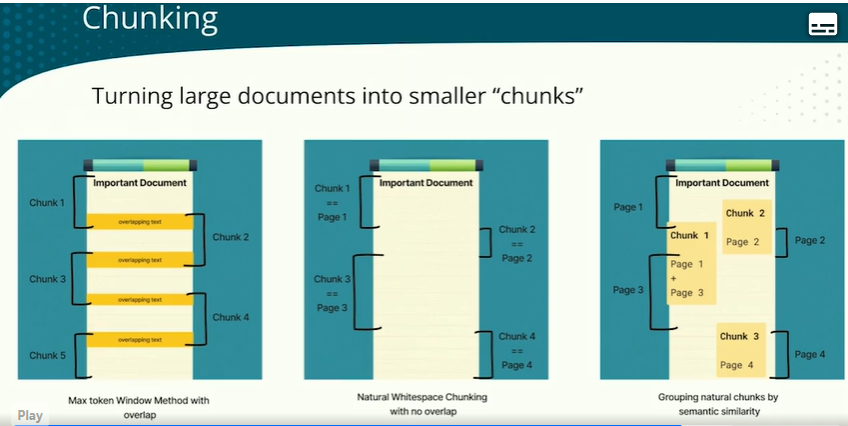

# Kodlamalar

In [31]:
!pip install pinecone-client openai sentence-transformers tiktoken datasets

In [32]:
pip install pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 5.8 MB/s eta 0:00:00


In [33]:
# OpenAI API ile çalışmak için OpenAI Python kütüphanesini içeri aktarır.
from openai import OpenAI

# datetime modülü, tarih ve zaman işlemleri yapmamıza olanak sağlar. Örneğin, tarih ve saat bilgisi alabiliriz.
from datetime import datetime

# hashlib modülü, verileri karma (hash) fonksiyonları ile şifrelememize yardımcı olur.
import hashlib

# re modülü, düzenli ifadeler (regex) kullanarak metinleri analiz etmeye ve işlemler yapmaya yarar.
import re

# os modülü, işletim sistemiyle ilgili işlemleri yapmamıza olanak tanır. Örneğin, dosya ve dizin işlemleri.
import os

# sentence-transformers kütüphanesi, doğal dil işleme (NLP) için kullanılan modelleri içerir.
# Burada 'CrossEncoder', cümleler arasındaki ilişkileri değerlendirip puanlamak için kullanılır.
from sentence_transformers import CrossEncoder

# tqdm modülü, döngülerde ilerleme çubuğu gösterir, genellikle uzun işlemlerde kullanılır.
from tqdm import tqdm

# numpy, sayısal işlemler ve dizilerle çalışmak için kullanılır.
import numpy as np

# torch modülü, PyTorch kütüphanesidir ve derin öğrenme işlemleri için kullanılır. nn (neural network) alt modülü, ağ yapıları tanımlamak için kullanılır.
from torch import nn

# logging modülü, hata ayıklama ve günlükleme için kullanılır. Uygulamanın çalışma zamanındaki mesajları kaydeder.
import logging

# pinecone modülü, Pinecone veri yapıları ve sunucu özellikleri ile çalışmamıza olanak sağlar. Özellikle vektör veri tabanları ve benzerlik aramaları için kullanılır.

import pinecone
from pinecone import ServerlessSpec


# logging yapılandırması yapılır ve kritik seviyedeki mesajları gösterir.
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
